In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import asarray
from numpy import save
import keras
import os
from os import listdir
import cv2 as cv
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

In [ ]:
folder = '/content/drive/MyDrive/gender/man' 
folder1='/content/drive/MyDrive/gender/woman'

folders=[folder,folder1]
photos, labels = list(), list()
for i in range (2):
  for file in listdir(folders[i]):
    output=i

    photo = load_img(folders[i]+'/'+file, target_size=(100,100))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/gender/gender_photos.npy',photos)
save('/content/drive/MyDrive/gender/gender_labels.npy',labels)

(2310, 100, 100, 3) (2310,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3, random_state=2)

In [ ]:
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [ ]:
#tạo model
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))


In [ ]:
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))  #Dense la full connected 
model.add(Dense(10, activation='Softmax'))

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1,validation_data=(x_test, y_test))

Epoch 1/100
13/13 [==============================] - 26s 2s/step - loss: 5.2421 - accuracy: 0.4842 - val_loss: 0.6443 - val_accuracy: 0.7316
Epoch 2/100
13/13 [==============================] - 24s 2s/step - loss: 1.1869 - accuracy: 0.6030 - val_loss: 0.6477 - val_accuracy: 0.6566
Epoch 3/100
13/13 [==============================] - 24s 2s/step - loss: 0.6758 - accuracy: 0.6710 - val_loss: 0.6152 - val_accuracy: 0.6768
Epoch 4/100
13/13 [==============================] - 24s 2s/step - loss: 0.5284 - accuracy: 0.7291 - val_loss: 0.5008 - val_accuracy: 0.7590
Epoch 5/100
13/13 [==============================] - 24s 2s/step - loss: 0.4279 - accuracy: 0.8089 - val_loss: 0.4220 - val_accuracy: 0.8124
Epoch 6/100
13/13 [==============================] - 27s 2s/step - loss: 0.3823 - accuracy: 0.8139 - val_loss: 0.4026 - val_accuracy: 0.8211
Epoch 7/100
13/13 [==============================] - 25s 2s/step - loss: 0.3619 - accuracy: 0.8349 - val_loss: 0.4748 - val_accuracy: 0.7720
Epoch 8/100
1

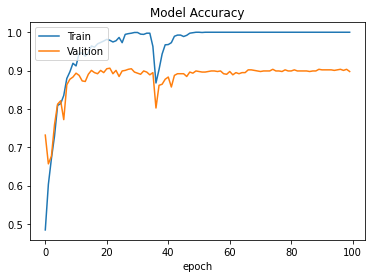

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Valition'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/gender/gender_model.h5')